# Lab 8: Implement Your Machine Learning Project Plan

In this lab assignment, you will implement the machine learning project plan you created in the written assignment. You will:

1. Load your data set and save it to a Pandas DataFrame.
2. Perform exploratory data analysis on your data to determine which feature engineering and data preparation techniques you will use.
3. Prepare your data for your model and create features and a label.
4. Fit your model to the training data and evaluate your model.
5. Improve your model by performing model selection and/or feature selection techniques to find best model for your problem.

### Import Packages

Before you get started, import a few packages.

In [1]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns

<b>Task:</b> In the code cell below, import additional packages that you have used in this course that you will need for this task.

In [2]:
# YOUR CODE HERE
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

## Part 1: Load the Data Set


You have chosen to work with one of four data sets. The data sets are located in a folder named "data." The file names of the three data sets are as follows:

* The "adult" data set that contains Census information from 1994 is located in file `adultData.csv`
* The airbnb NYC "listings" data set is located in file  `airbnbListingsData.csv`
* The World Happiness Report (WHR) data set is located in file `WHR2018Chapter2OnlineData.csv`
* The book review data set is located in file `bookReviewsData.csv`



<b>Task:</b> In the code cell below, use the same method you have been using to load your data using `pd.read_csv()` and save it to DataFrame `df`.

In [3]:
# YOUR CODE HERE
WHRDataSet_filename = os.path.join(os.getcwd(), "data", "WHR2018Chapter2OnlineData.csv")
df = pd.read_csv(WHRDataSet_filename, header=0)

df.head()

,country,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,GINI index (World Bank estimate),"GINI index (World Bank estimate), average 2000-15","gini of household income reported in Gallup, by wp5-year"
0,Afghanistan,2008,3.723590,7.168690,0.450662,49.209663,0.718114,0.181819,0.881686,0.517637,0.258195,0.612072,-1.929690,-1.655084,1.774662,0.476600,NaN,NaN,NaN
1,Afghanistan,2009,4.401778,7.333790,0.552308,49.624432,0.678896,0.203614,0.850035,0.583926,0.237092,0.611545,-2.044093,-1.635025,1.722688,0.391362,NaN,NaN,0.441906
2,Afghanistan,2010,4.758381,7.386629,0.539075,50.008961,0.600127,0.137630,0.706766,0.618265,0.275324,0.299357,-1.991810,-1.617176,1.878622,0.394803,NaN,NaN,0.327318
3,Afghanistan,2011,3.831719,7.415019,0.521104,50.367298,0.495901,0.175329,0.731109,0.611387,0.267175,0.307386,-1.919018,-1.616221,1.785360,0.465942,NaN,NaN,0.336764
4,Afghanistan,2012,3.782938,7.517126,0.520637,50.709263,0.530935,0.247159,0.775620,0.710385,0.267919,0.435440,-1.842996,-1.404078,1.798283,0.475367,NaN,NaN,0.344540


## Part 2: Exploratory Data Analysis

The next step is to inspect and analyze your data set with your machine learning problem and project plan in mind. 

This step will help you determine data preparation and feature engineering techniques you will need to apply to your data to build a balanced modeling data set for your problem and model. These data preparation techniques may include:
* addressing missingness, such as replacing missing values with means
* renaming features and labels
* finding and replacing outliers
* performing winsorization if needed
* performing one-hot encoding on categorical features
* performing vectorization for an NLP problem
* addressing class imbalance in your data sample to promote fair AI


Think of the different techniques you have used to inspect and analyze your data in this course. These include using Pandas to apply data filters, using the Pandas `describe()` method to get insight into key statistics for each column, using the Pandas `dtypes` property to inspect the data type of each column, and using Matplotlib and Seaborn to detect outliers and visualize relationships between features and labels. If you are working on a classification problem, use techniques you have learned to determine if there is class imbalance.


<b>Task</b>: Use the techniques you have learned in this course to inspect and analyze your data. 

<b>Note</b>: You can add code cells if needed by going to the <b>Insert</b> menu and clicking on <b>Insert Cell Below</b> in the drop-drown menu.

In [4]:
# YOUR CODE HERE
df.describe()

,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,GINI index (World Bank estimate),"GINI index (World Bank estimate), average 2000-15","gini of household income reported in Gallup, by wp5-year"
count,1562.000000,1562.000000,1535.000000,1549.000000,1553.000000,1533.000000,1482.000000,1472.000000,1544.000000,1550.000000,1401.000000,1391.000000,1391.000000,1562.000000,1562.000000,583.000000,1386.000000,1205.000000
mean,2011.820743,5.433676,9.220822,0.810669,62.249887,0.728975,0.000079,0.753622,0.708969,0.263171,0.480207,-0.126617,0.004947,2.003501,0.387271,0.372846,0.386948,0.445204
std,3.419787,1.121017,1.184035,0.119370,7.960671,0.145408,0.164202,0.185538,0.107644,0.084006,0.190724,0.873259,0.981052,0.379684,0.119007,0.086609,0.083694,0.105410
min,2005.000000,2.661718,6.377396,0.290184,37.766476,0.257534,-0.322952,0.035198,0.362498,0.083426,0.068769,-2.448228,-2.144974,0.863034,0.133908,0.241000,0.228833,0.223470
25%,2009.000000,4.606351,8.310665,0.748304,57.299580,0.633754,-0.114313,0.697359,0.621471,0.204116,0.334732,-0.772010,-0.717463,1.737934,0.309722,0.307000,0.321583,0.368531
50%,2012.000000,5.332600,9.398610,0.833047,63.803192,0.748014,-0.022638,0.808115,0.717398,0.251798,0.463137,-0.225939,-0.210142,1.960345,0.369751,0.349000,0.371000,0.425395
75%,2015.000000,6.271025,10.190634,0.904329,68.098228,0.843628,0.094649,0.880089,0.800858,0.311515,0.610723,0.665944,0.717996,2.215920,0.451833,0.433500,0.433104,0.508579
max,2017.000000,8.018934,11.770276,0.987343,76.536362,0.985178,0.677773,0.983276,0.943621,0.704590,0.993604,1.540097,2.184725,3.527820,1.022769,0.648000,0.626000,0.961435


In [5]:
#winsorize the data
df['Confidence in national government']=stats.mstats.winsorize(df['Confidence in national government'], limits=[0.01, 0.01])

In [6]:
df.dtypes

country                                                      object
year                                                          int64
Life Ladder                                                 float64
Log GDP per capita                                          float64
Social support                                              float64
Healthy life expectancy at birth                            float64
Freedom to make life choices                                float64
Generosity                                                  float64
Perceptions of corruption                                   float64
Positive affect                                             float64
Negative affect                                             float64
Confidence in national government                           float64
Democratic Quality                                          float64
Delivery Quality                                            float64
Standard deviation of ladder by country-year    

In [7]:
#Perform one-hot encoding
to_encode=list(df.select_dtypes(include=['object']).columns)

In [8]:
encoder=OneHotEncoder(handle_unknown='error', sparse=False)
df_enc=pd.DataFrame(encoder.fit_transform(df[to_encode]))
df_enc.columns=encoder.get_feature_names(to_encode)
df.drop(columns=df[to_encode], axis=1, inplace=True)
df=df.join(df_enc)

In [9]:
#normalize the data
for feature in df.columns:
    df[feature]=(df[feature]-df[feature].min())/(df[feature].max()-df[feature].min())

In [10]:
df.head()

,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,...,country_United Arab Emirates,country_United Kingdom,country_United States,country_Uruguay,country_Uzbekistan,country_Venezuela,country_Vietnam,country_Yemen,country_Zambia,country_Zimbabwe
0,0.250000,0.198213,0.146729,0.230189,0.295157,0.632975,0.504406,0.892847,0.266965,0.281358,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.333333,0.324807,0.177344,0.375989,0.305855,0.579078,0.526185,0.859462,0.381035,0.247385,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.416667,0.391372,0.187142,0.357007,0.315773,0.470826,0.460249,0.708347,0.440127,0.308933,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.500000,0.218397,0.192406,0.331229,0.325016,0.327588,0.497920,0.734022,0.428291,0.295814,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.583333,0.209291,0.211340,0.330559,0.333836,0.375735,0.569698,0.780971,0.598646,0.297012,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
#search for missing values
nan_count=np.sum(df.isnull(), axis=0)
condition=nan_count!=0
col_names=nan_count[condition].index
nan_cols=list(col_names)
print(nan_cols)

['Log GDP per capita', 'Social support', 'Healthy life expectancy at birth', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption', 'Positive affect', 'Negative affect', 'Confidence in national government', 'Democratic Quality', 'Delivery Quality', 'GINI index (World Bank estimate)', 'GINI index (World Bank estimate), average 2000-15', 'gini of household income reported in Gallup, by wp5-year']


In [12]:
#fill in missing values
for column in df.columns:
    df[column].fillna(value=df[column].mean(), inplace=True)

In [13]:
#make sure missing values were replaced
df.isnull().values.any()

False

In [14]:
#find the features with the strongest correlation to the data
exclude=['Confidence in national government']
corrs=df.corr()['Confidence in national government'].drop(exclude, axis=0)
corrs_sorted=corrs.sort_values(ascending=False)
corrs_reverse=corrs.sort_values(ascending=True)

In [15]:
top_three_corr=list(corrs_sorted.index[0:3])
neg_top_three_corr=list(corrs_reverse.index[0:3])

In [16]:
#make a list of features that are strongly correlated to the label
features=list(top_three_corr + neg_top_three_corr)
print(features)

['Freedom to make life choices', 'Generosity', 'country_Singapore', 'Perceptions of corruption', 'Healthy life expectancy at birth', 'Standard deviation of ladder by country-year']


## Part 3: Implement Your Project Plan

<b>Task:</b> Use the rest of this notebook to carry out your project plan. You will:

1. Prepare your data for your model and create features and a label.
2. Fit your model to the training data and evaluate your model.
3. Improve your model by performing model selection and/or feature selection techniques to find best model for your problem.


Add code cells below and populate the notebook with commentary, code, analyses, results, and figures as you see fit.

In [17]:
# YOUR CODE HERE
y=df['Confidence in national government']
X=df.drop(columns='Confidence in national government', axis=1) 
#start with using all the columns as features, specialize later to hopefully prevent execution bottleneck and optimize performance

In [18]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.20, random_state=1234)

In [19]:
print('Begin GBDT Implementation...') #building GBDT with default hyperparameters

gbdt_model_default=GradientBoostingRegressor()
#fit the model to the training data
gbdt_model_default.fit(X_train, y_train)
#make predictions on the test data
y_gbdt_default_pred=gbdt_model_default.predict(X_test)
#Compute the RMSE and R2 on y_test and y_gbdt_default_pred
gbdt_default_rmse=mean_squared_error(y_test, y_gbdt_default_pred, squared=False)
gbdt_default_r2=r2_score(y_test, y_gbdt_default_pred)

print('Default GBDT Root Mean Squared Error : {0}'.format(gbdt_default_rmse))
print('Default GBDT R2 {0}'.format(gbdt_default_r2))

Begin GBDT Implementation...
Default GBDT Root Mean Squared Error : 0.1215410406002189
Default GBDT R2 0.6320065432007932


In [20]:
print('Begin RF Implementation...') #building RF with default hyperparameters

rf_model_default=RandomForestRegressor()
# Fit the model to the training data
rf_model_default.fit(X_train, y_train)
# Use the fitted model to make predictions on the test data. 
y_rf_default_pred=rf_model_default.predict(X_test)
# Compute the RMSE and R2 (on y_test and y_rf_default_pred) 
rf_default_rmse=mean_squared_error(y_test, y_rf_default_pred, squared=False)
rf_default_r2=r2_score(y_test, y_rf_default_pred)

print('Default Random Forest Root Mean Squared Error: {0}'.format(rf_default_rmse))
print('Default Random Forest R2: {0}'.format(rf_default_r2))

Begin RF Implementation...
Default Random Forest Root Mean Squared Error: 0.1162949134420247
Default Random Forest R2: 0.663088654930489


In [21]:
print('Begin GBDT Implementation...') #building GBDT with hyperparameters from lab 6

gbdt_model_lab=GradientBoostingRegressor(max_depth=2, n_estimators=300)
#fit the model to the training data
gbdt_model_lab.fit(X_train, y_train)
#make a prediction on the test data
y_gbdt_lab_pred=gbdt_model_lab.predict(X_test)
#compute the RMSE and R2
gbdt_lab_rmse=mean_squared_error(y_test, y_gbdt_lab_pred, squared=False)
gbdt_lab_r2=r2_score(y_test, y_gbdt_lab_pred)

print(' Lab 6 GBDT Root Mean Squared Error : {0}'.format(gbdt_lab_rmse))
print(' Lab 6 GBDT R2 {0}'.format(gbdt_lab_r2))

Begin GBDT Implementation...
 Lab 6 GBDT Root Mean Squared Error : 0.11653791367823288
 Lab 6 GBDT R2 0.6616792197640702


In [22]:
print('Begin RF Implementation...') #building RF with hyperparameters from lab 6

rf_model_lab=RandomForestRegressor(max_depth=32, n_estimators=300)
# fit the model to the training data
rf_model_lab.fit(X_train, y_train)
# make predictions on the test data 
y_rf_lab_pred=rf_model_lab.predict(X_test)
#compute the RMSE and R2 
rf_lab_rmse=mean_squared_error(y_test, y_rf_lab_pred, squared=False)
rf_lab_r2=r2_score(y_test, y_rf_lab_pred)

print('Lab 6 Random Forest Root Mean Squared Error: {0}'.format(rf_lab_rmse))
print('Lab 6 Random Forest R2: {0}'.format(rf_lab_r2))

Begin RF Implementation...
Lab 6 Random Forest Root Mean Squared Error: 0.11582913471936189
Lab 6 Random Forest R2: 0.6657820122728492


In [23]:
#searching for the most influential features
feature_imp=gbdt_model_default.feature_importances_

dict1={'name': X_train.columns.values, 'imp': feature_imp}

#convert dictionary to a dataframe
df_best_features=pd.DataFrame(dict1)
#sort the features, with the most influential at the beginning
df_sorted=df_best_features.sort_values('imp', ascending=False)

df_best_col=df_sorted['name']
#create a list with the most important features
top_six=list(df_best_col.iloc[:6])
print('Top six features: {0}'.format(top_six))

#feature2_imp=rf_model_default.feature_importances_
#dict2={'name': X_train.columns.values, 'imp': feature2_imp}
#df_best_features2=pd.DataFrame(dict1)
#df_sorted2=df_best_features2.sort_values('imp', ascending=False)
#df_col2=df_sorted2['name']
#top_six=list(df_col2.iloc[:6])
#print('Top six features: {0}'.format(top_six))

#Performing feature selection with the random forest model produced the same results as the GBDT model

Top six features: ['Perceptions of corruption', 'Freedom to make life choices', 'Healthy life expectancy at birth', 'Life Ladder', 'Log GDP per capita', 'Standard deviation of ladder by country-year']


In [24]:
#Performing a grid search to find the best hyperparameters for the GBDT

md=[2**n for n in range(1, 7)]
ne=[25*2**n for n in range(0, 6)]
param_grid={'max_depth':md, 'n_estimators':ne}

param_grid

{'max_depth': [2, 4, 8, 16, 32, 64],
 'n_estimators': [25, 50, 100, 200, 400, 800]}

In [25]:
print('Running Grid Search...') #grid search to find strong hyperparameters for the random forest

model_rf=RandomForestRegressor()
#run Grid Search with 5-fold cross-validation
grid=GridSearchCV(model_rf, param_grid, cv=5)

#fit the model to the training data
grid_search_rf=grid.fit(X_train, y_train)

print("Done")

Running Grid Search...
Done


In [26]:
#access the best hyperparameter value for max_depth
best_md_rf=grid_search_rf.best_estimator_.max_depth
#access the best hyperparameter value for n_estimators
best_ne_rf=grid_search_rf.best_estimator_.n_estimators

print('Best value for max depth: {0}'.format(best_md_rf))
print('Best value for number of estimators: {0}'.format(best_ne_rf))

Best value for max depth: 16
Best value for number of estimators: 100


In [27]:
print('Running Grid Search...') #grid search to find strong hyperparameters for the GBDT

model_GBDT=GradientBoostingRegressor()
#run Grid Search with 5-fold cross-validation
grid=GridSearchCV(model_GBDT, param_grid, cv=5)

#fit the model to the training data
grid_search_GBDT=grid.fit(X_train, y_train)

print("Done")

Running Grid Search...
Done


In [28]:
#access the best hyperparameter value for max_depth
best_md_GBDT=grid_search_GBDT.best_estimator_.max_depth
#access the best hyperparameter value for n_estimators
best_ne_GBDT=grid_search_GBDT.best_estimator_.n_estimators

print('Best value for max depth: {0}'.format(best_md_GBDT))
print('Best value for number of estimators: {0}'.format(best_ne_GBDT))

Best value for max depth: 4
Best value for number of estimators: 800


In [29]:
print('Begin GBDT Implementation...') #building GBDT with the best hyperparameters

gbdt_model_hyp=GradientBoostingRegressor(max_depth=best_md_GBDT, n_estimators=best_ne_GBDT)
#fit the model to the training data
gbdt_model_hyp.fit(X_train, y_train)

#make predictions on the test data
y_gbdt_hyp_pred=gbdt_model_hyp.predict(X_test)

#compute the RMSE and R2
gbdt_hyp_rmse=mean_squared_error(y_test, y_gbdt_hyp_pred, squared=False)

gbdt_hyp_r2=r2_score(y_test, y_gbdt_hyp_pred)

print('End')

print('GBDT Best Hyperparameters Root Mean Squared Error : {0}'.format(gbdt_hyp_rmse))
print('GBDT Best Hyperparameters R2 {0}'.format(gbdt_hyp_r2))

Begin GBDT Implementation...
End
GBDT Best Hyperparameters Root Mean Squared Error : 0.10829456922133503
GBDT Best Hyperparameters R2 0.7078488823023207


In [30]:
print('Begin RF Implementation...') #building RF with the best hyperparameters

rf_model_hyp=RandomForestRegressor(max_depth=best_md_rf, n_estimators=best_ne_rf)
#fit the model to the training data
rf_model_hyp.fit(X_train, y_train)

#make predictions on the test data
y_rf_hyp_pred=rf_model_hyp.predict(X_test)

#compute the RMSE and R2 scores
rf_hyp_rmse=mean_squared_error(y_test, y_rf_hyp_pred, squared=False)

rf_hyp_r2=r2_score(y_test, y_rf_hyp_pred)

print('End')

print('Random Forest Best Hyperparameters Root Mean Squared Error: {0}'.format(rf_hyp_rmse))

print('Random Forest Best Hyperparameters R2 Score: {0}'.format(rf_hyp_r2))

Begin RF Implementation...
End
Random Forest Best Hyperparameters Root Mean Squared Error: 0.11728122426231116
Random Forest Best Hyperparameters R2 Score: 0.6573496517366115


In [31]:
X_corr=df[features] #using strongly correlated features
X_train_corr, X_test_corr, y_train, y_test=train_test_split(X_corr, y, test_size=0.20, random_state=1234)

In [32]:
print('Begin GBDT Implementation...') #building GBDT with the best hyperparameters and features that are strongly correlated to the label

gbdt_model_corr=GradientBoostingRegressor(max_depth=best_md_GBDT, n_estimators=best_ne_GBDT)

#fit the model to the training data
gbdt_model_corr.fit(X_train_corr, y_train) #Here, the X_train_corr and X_test_corr feature sets are used

#make predictions on the test data
y_gbdt_corr_pred=gbdt_model_corr.predict(X_test_corr)

#compute the RMSE and R2 scores
gbdt_corr_rmse=mean_squared_error(y_test, y_gbdt_corr_pred, squared=False)

gbdt_corr_r2=r2_score(y_test, y_gbdt_corr_pred)

print('End')

print('GBDT With Strongly Correlated Features Root Mean Squared Error : {0}'.format(gbdt_corr_rmse))
print('GBDT With Strongly Correlated Features R2 {0}'.format(gbdt_corr_r2))

Begin GBDT Implementation...
End
GBDT With Strongly Correlated Features Root Mean Squared Error : 0.14450543470035734
GBDT With Strongly Correlated Features R2 0.47980933121678004


In [33]:
print('Begin RF Implementation...') #building RF with the best hyperparameters and features that are strongly correlated to the label

rf_model_corr=RandomForestRegressor(max_depth=best_md_rf, n_estimators=best_ne_rf)

#fit the model to the training data
rf_model_corr.fit(X_train_corr, y_train)

#make predictions on the test data
y_rf_corr_pred=rf_model_corr.predict(X_test_corr)

#compute the RMSE and R2 scores
rf_corr_rmse=mean_squared_error(y_test, y_rf_corr_pred, squared=False)

rf_corr_r2=r2_score(y_test, y_rf_corr_pred)

print('End')

print('Random Forest Strongly Correlated Features Root Mean Squared Error: {0}'.format(rf_corr_rmse))

print('Random Forest Strongly Correlated Features R2 Score: {0}'.format(rf_corr_r2))

Begin RF Implementation...
End
Random Forest Strongly Correlated Features Root Mean Squared Error: 0.12945060628316635
Random Forest Strongly Correlated Features R2 Score: 0.582552010666106


In [34]:
X_best=df[top_six] #using best features
X_train_best, X_test_best, y_train, y_test=train_test_split(X_best, y, test_size=0.20, random_state=1234)

In [35]:
print('Begin GBDT Implementation...') #building GBDT with the best hyperparameters and best features

gbdt_model_best=GradientBoostingRegressor(max_depth=best_md_GBDT, n_estimators=best_ne_GBDT)

#fit the model to the training data
gbdt_model_best.fit(X_train_best, y_train) #Here, the X_train_best and X_test_best feature sets are used

#make predictions on the test data
y_gbdt_best_pred=gbdt_model_best.predict(X_test_best)

#compute the RMSE and R2 scores
gbdt_best_rmse=mean_squared_error(y_test, y_gbdt_best_pred, squared=False)

gbdt_best_r2=r2_score(y_test, y_gbdt_best_pred)

print('End')

print('GBDT With Best Features Root Mean Squared Error : {0}'.format(gbdt_best_rmse))
print('GBDT With Best Features R2 {0}'.format(gbdt_best_r2))

Begin GBDT Implementation...
End
GBDT With Best Features Root Mean Squared Error : 0.13525186026992897
GBDT With Best Features R2 0.5442982563721321


In [36]:
print('Begin RF Implementation...') #building RF with the best hyperparameters and best features

rf_model_best=RandomForestRegressor(max_depth=best_md_rf, n_estimators=best_ne_rf)

#fit the model to the training data
rf_model_best.fit(X_train_best, y_train)

#make predictions on the test data
y_rf_best_pred=rf_model_best.predict(X_test_best)

#compute the RMSE and R2 scores
rf_best_rmse=mean_squared_error(y_test, y_rf_best_pred, squared=False)

rf_best_r2=r2_score(y_test, y_rf_best_pred)

print('End')

print('Random Forest Best Features Root Mean Squared Error: {0}'.format(rf_best_rmse))

print('Random Forest Best Features R2 Score: {0}'.format(rf_best_r2))

Begin RF Implementation...
End
Random Forest Best Features Root Mean Squared Error: 0.13124155549820235
Random Forest Best Features R2 Score: 0.5709213217358234


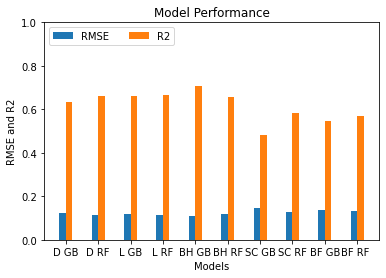

In [37]:
#create a bar graph to compare the results of each model
RMSE_Results=[gbdt_default_rmse, rf_default_rmse, gbdt_lab_rmse, rf_lab_rmse, gbdt_hyp_rmse, rf_hyp_rmse, gbdt_corr_rmse, rf_corr_rmse, gbdt_best_rmse, rf_best_rmse]
R2_Results=[gbdt_default_r2, rf_default_r2, gbdt_lab_r2, rf_lab_r2, gbdt_hyp_r2, rf_hyp_r2, gbdt_corr_r2, rf_corr_r2, gbdt_best_r2, rf_best_r2]
labels=['D GB' , 'D RF', 'L GB',  'L RF', 'BH GB', 'BH RF', 'SC GB', 'SC RF', 'BF GB', 'BF RF ']

#'D GB'= Default GBDT   'D RF'=Default Random Forest   'L GB'=Lab GBDT  'L RF'=Lab Random Forest
#'BH GB'=Best Hyperparameters GBDT    'BH RF'=Best Hyperparameters Random Forest
#'SC GB'=Strongly Correlated GBDT     'SC RF'=Strongly Correlated Random Forest
#'BF GB'=Best Features GBDT           'BF RF'=Best Features Random Forest
rg=np.arange(10)
width=0.20

plt.bar(rg, RMSE_Results, width, label="RMSE")

plt.bar(rg+width, R2_Results, width, label="R2")

plt.xticks(rg+width/2, labels)

plt.xlabel("Models")
plt.ylabel("RMSE and R2")
plt.ylim([0, 1])
plt.title('Model Performance')
plt.legend(loc='upper left', ncol=2)
plt.show()

The actual model performance is quite different than what I predicted in my project plan. In order to reduce the chance of execution bottleneck, I thought it would be a good idea to only use the features that were strongly correlated to the label. However, this resulted in the weakest performance for both the gradient boosted decision tree (with an RMSE of 0.145 and R2 score of 0.480) and the second weakest for the random forest (with an RMSE of 0.130 and R2 score of 0.582). The performance of the GBDT using both the best hyperparameters and best features performed slightly better, having an RMSE of 0.135 and R2 score of 0.544. Interestingly enough, using these features resulted in the weakest random forest, with an RMSE of 0.131 and R2 score of 0.571. The best performance overall came from the GBDT which used all of the data frame's columns (except for the label) as features and the model's best hyperparameters, resulting in an RMSE of 0.108 and an R2 score of 0.708.